# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create dataframes for cases_train.csv and location.csv
df_ct = pd.read_csv('../data/cases_train.csv') 
df_l = pd.read_csv('../data/location.csv')

## Bar Chart (cases_train.csv)

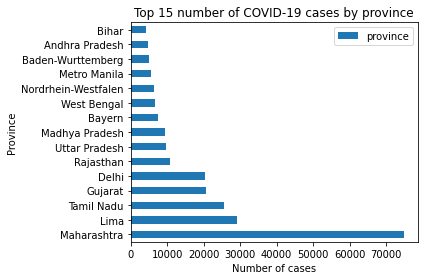

In [3]:
# top 15 number of cases by province
top_15_provinces = pd.DataFrame(df_ct['province'].value_counts().head(15))
top_15_provinces.plot(
    title = 'Top 15 number of COVID-19 cases by province',
    kind = 'barh'
)

plt.xlabel('Number of cases')
plt.ylabel('Province')
plt.tight_layout()
# call savefig before show otherwise it will be a corrupt image
plt.savefig('../plots/cases_by_province.pdf')
plt.show()